/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

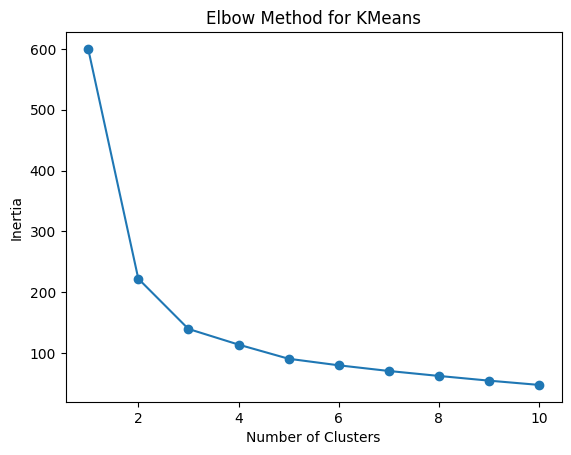

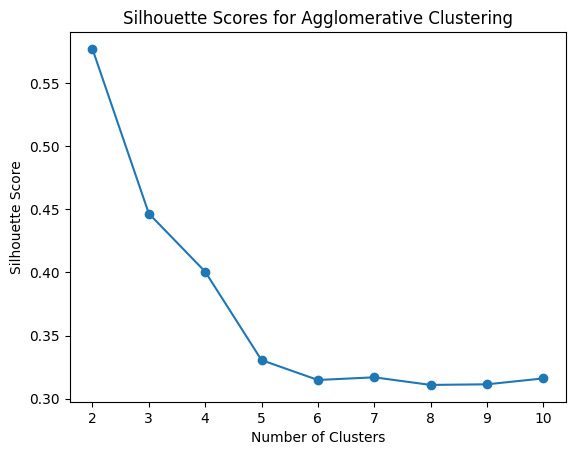

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


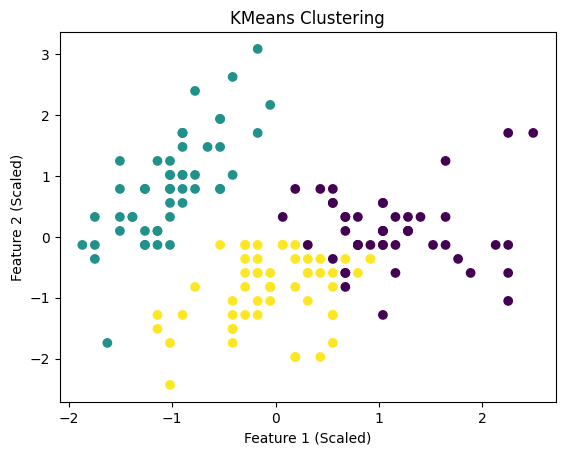

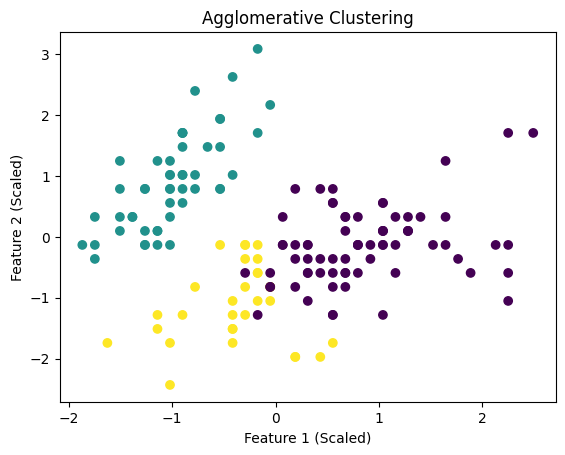

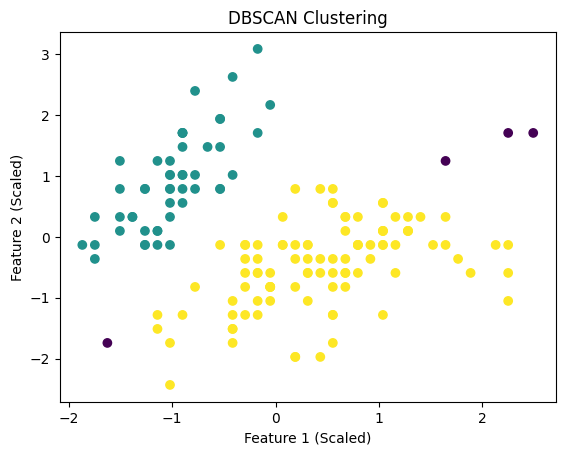

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to find the optimum number of clusters using the Elbow Method
def find_optimal_clusters_kmeans(data, max_clusters=10):
    inertias = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    return inertias

# Function to find the optimum number of clusters using the Agglomerative Clustering
def find_optimal_clusters_agglomerative(data, max_clusters=10):
    sil_scores = []
    for i in range(2, max_clusters + 1):
        agglomerative = AgglomerativeClustering(n_clusters=i)
        labels = agglomerative.fit_predict(data)
        sil_scores.append(silhouette_score(data, labels))
    return sil_scores

# Plot the Elbow Method for KMeans
kmeans_inertias = find_optimal_clusters_kmeans(X_scaled)
plt.plot(range(1, len(kmeans_inertias) + 1), kmeans_inertias, marker='o')
plt.title('Elbow Method for KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Plot Silhouette Scores for Agglomerative Clustering
agglomerative_sil_scores = find_optimal_clusters_agglomerative(X_scaled)
plt.plot(range(2, len(agglomerative_sil_scores) + 2), agglomerative_sil_scores, marker='o')
plt.title('Silhouette Scores for Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Apply KMeans with the optimum number of clusters
optimal_kmeans_clusters = 3  # As determined by the Elbow Method
kmeans_model = KMeans(n_clusters=optimal_kmeans_clusters, random_state=42)
kmeans_labels = kmeans_model.fit_predict(X_scaled)

# Apply Agglomerative Clustering with the optimum number of clusters
optimal_agglomerative_clusters = 3  # As determined by the Silhouette Scores
agglomerative_model = AgglomerativeClustering(n_clusters=optimal_agglomerative_clusters)
agglomerative_labels = agglomerative_model.fit_predict(X_scaled)

# Apply DBSCAN clustering
dbscan_model = DBSCAN(eps=0.8, min_samples=5)  # Adjust parameters as needed
dbscan_labels = dbscan_model.fit_predict(X_scaled)

# Plot the clusters for KMeans
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.show()

# Plot the clusters for Agglomerative Clustering
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglomerative_labels, cmap='viridis', marker='o')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.show()

# Plot the clusters for DBSCAN
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.show()
